## SVM Implementation Using Pegasos

   ### -> Formulating SVM as Unconstrainted Optimization Problem 

### Generate Dataset 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [2]:
X, Y = make_classification(n_classes=2, n_samples=400, n_clusters_per_class=1, random_state=3, n_features=2, n_informative=2, n_redundant=0)

In [3]:
# Convert our Y-Labels into {-1, 1}
Y[Y==0] = -1

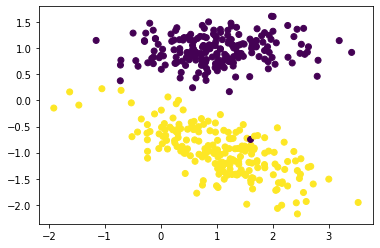

In [4]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

### Define SVM Class

In [5]:
class SVM:
    
    def __init__(self, C=1.0):
        
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self, W, b, X, Y):
        
        loss = 0.0
        loss += 0.5 * np.dot(W, W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i] * (np.dot(W, X[i].T) + b) # Scalar
            loss += self.C * max(0, (1-ti))
            
        return loss[0][0]
    
    def fit(self, X, Y, batch_size=100, learning_rate=0.001, maxItr=300):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        # Init The Model Parameters
        W = np.zeros((1, no_of_features))
        bias = 0
        
        # Training
        # Weight and Bias Update Rule
        losses = []
        
        for i in range(maxItr):
            # Training Loop
            l = self.hingeLoss(W, bias, X, Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            # Batch Gradient Descent With Random Sampling
            for batch_start in range(0, no_of_samples, batch_size):
                
                # Assume Zero Gradient For The Batch
                gradw = 0
                gradb = 0
                
                # Iterate Over All Examples in the Mini Batch
                for j in range(batch_start, batch_start+batch_size):
                    if (j < no_of_samples):
                        i = ids[j]
                    
                        ti = Y[i] * (np.dot(W, X[i].T) + bias)
                    
                        if (ti > 1):
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c * Y[i] * X[i]
                            gradb += c * Y[i]
                            
                # Gradient For The Batch Is Ready
                W = W - n*W + n*gradw
                bias = bias + n*gradb
            
        self.W = W
        self.b = bias
        return W, bias, losses

### Training Our SVM Model

In [6]:
mySVM = SVM()
W, b, losses = mySVM.fit(X,Y, maxItr=100)
print(losses[0], losses[-1])

400.0 14.954910659095866


### Visualising Loss

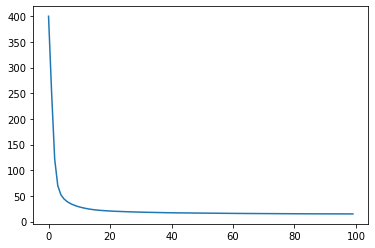

In [7]:
plt.plot(losses)
plt.show()

In [8]:
W, B = mySVM.W, mySVM.b
print(W, b)

[[-0.32291043 -2.03475112]] 0.3850000000000003


### Visualising Main Hyperplane

In [9]:
def plotHyperplane(w1, w2, b):
    plt.figure(figsize=(12,12))
    x_1 = np.linspace(-2, 4, 10)
    x_2 = -((w1 * x_1) + b)/w2
    plt.plot(x_1, x_2)
    plt.scatter(X[:,0], X[:,1], c=Y)
    plt.show()

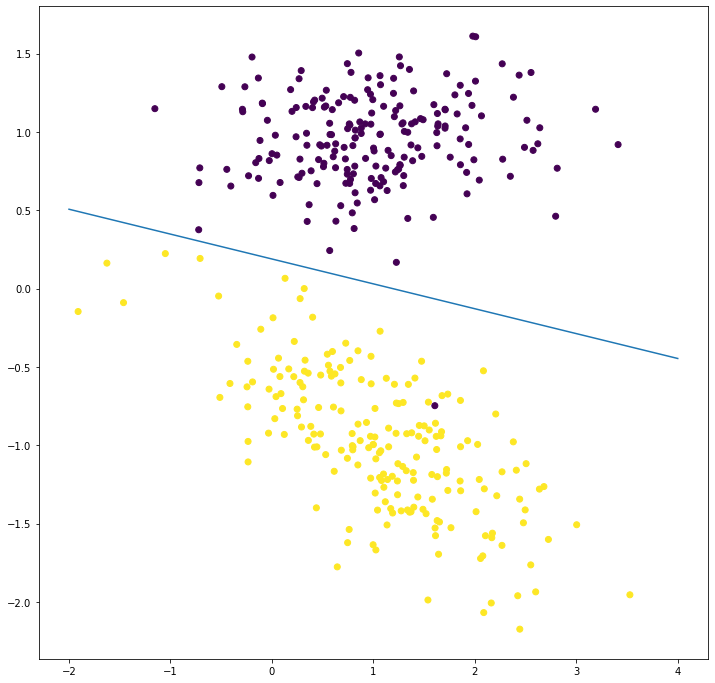

In [10]:
plotHyperplane(W[0,0], W[0,1], b)

### Visualising Support Vectors, Positive and Negative Hyperplanes

In [11]:
def plotAllHyperplanes(w1, w2, b):
    plt.figure(figsize=(15,12))
    x_1 = np.linspace(-2, 4, 10)
    x_2 = -((w1 * x_1) + b)/w2 # WT + B = 0
    
    x_p = -((w1 * x_1) + b + 1)/w2 # WT + B = 1
    x_n = -((w1 * x_1) + b - 1)/w2 # WT + B = -1
    
    plt.plot(x_1, x_2, linewidth=3, label="Hyperplane WX + B = 0")
    plt.plot(x_1, x_p, linestyle='dashed', linewidth=2.5, label="Positive Hyperplane WX + B = 1")
    plt.plot(x_1, x_n, linestyle='dashed', linewidth=2.5, label="Negative Hyperplane WX + B = -1")
    plt.legend()
    plt.scatter(X[:,0], X[:,1], c=Y)
    plt.show()

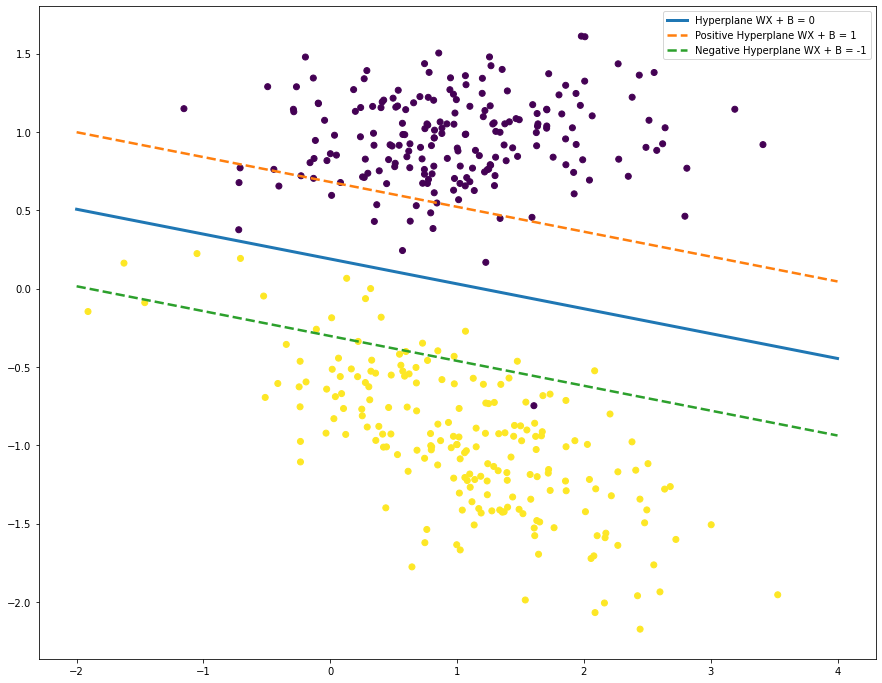

In [12]:
plotAllHyperplanes(W[0,0], W[0,1], b)

### Effect of Chaging 'c'

In [13]:
# Lets Take A High Value of 'c'

mySVM_high_c = SVM(C=1000)
W, b, losses = mySVM_high_c.fit(X,Y, maxItr=100)
print(losses[0], losses[-1])

400000.0 18598.449338246744


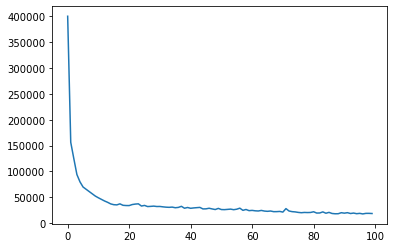

In [14]:
plt.plot(losses)
plt.show()

In [15]:
W, B = mySVM_high_c.W, mySVM.b
print(W, b)

[[-11.13327875 -34.60699103]] 4.0


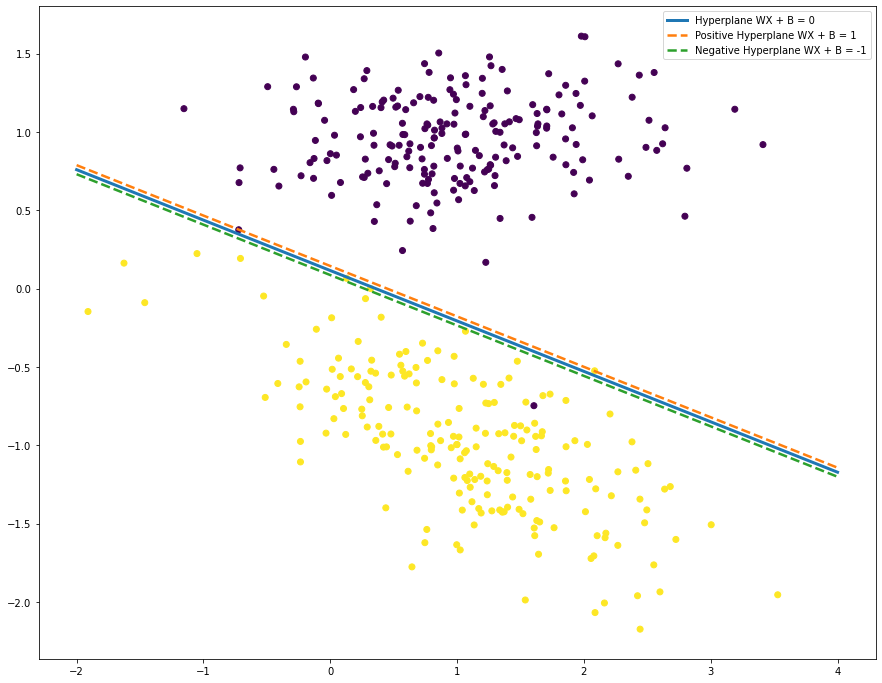

In [16]:
plotAllHyperplanes(W[0,0], W[0,1], b)